In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import random

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [ ]:
class Linear_Regression:
  def __init__(self, X_Train, Y_Target, num_epoch = 10000, learning_rate = 0.0001):
    self.X_Train = X_Train
    self.Y_Target = Y_Target
    self.num_samples = X_Train.shape[0]
    self.learning_rate = learning_rate
    self.theta = np.array([random.gauss(mu=1.0, sigma=0.01) for _ in range(X_Train.shape[1])]).reshape(-1, 1)
    self.losses = []
    self.num_epoch = num_epoch

  def predict(self, X_data):
    y_pred = X_data.dot(self.theta)
    return y_pred

  def compute_loss(self, y_pred, y_target):
    loss = (y_pred - y_target)*(y_pred - y_target)
    return np.sum(loss)

  def fit(self):
    for epoch in range(self.num_epoch):
      y_pred = self.predict(self.X_Train)
      loss = self.compute_loss(y_pred, self.Y_Target)
      self.losses.append(loss)
      k = 2*(y_pred-self.Y_Target)
      gradient = self.X_Train.T.dot(k)/self.num_samples
      self.theta = self.theta - self.learning_rate*gradient

    return (self.losses), self.theta



In [ ]:
X_data = np.array([1, 2, 3, 5, 7, 10, 11, 15, 20, 25, 33, 38, 40, 42, 45, 50, 55, 56]).reshape(-1, 1)
X_raw = X_data
X_data = np.hstack(((np.ones((X_data.shape[0], 1))), X_data))
y_data = np.array([2, 4.1, 5.9, 9.8, 13.6, 21, 22, 28, 39, 44, 67, 80, 79.9, 83.3, 90.5, 99.9, 110.1, 111]).reshape(-1, 1)

In [ ]:
X_data

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  5.],
       [ 1.,  7.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 15.],
       [ 1., 20.],
       [ 1., 25.],
       [ 1., 33.],
       [ 1., 38.],
       [ 1., 40.],
       [ 1., 42.],
       [ 1., 45.],
       [ 1., 50.],
       [ 1., 55.],
       [ 1., 56.]])

In [ ]:
y_data.shape

(18, 1)

In [ ]:
linear_model = Linear_Regression(X_data, y_data)

In [ ]:
loss, weight = linear_model.fit()

Epoch: 0, Loss: 17460.72218699789
Epoch: 1, Loss: 11153.900702701181
Epoch: 2, Loss: 7134.7339187609605
Epoch: 3, Loss: 4573.427345818889
Epoch: 4, Loss: 2941.175491916264
Epoch: 5, Loss: 1900.9849786782293
Epoch: 6, Loss: 1238.0990783562693
Epoch: 7, Loss: 815.6591608619551
Epoch: 8, Loss: 546.4489381374173
Epoch: 9, Loss: 374.8878384811754
Epoch: 10, Loss: 265.55587304191147
Epoch: 11, Loss: 195.88084488422854
Epoch: 12, Loss: 151.47810593188413
Epoch: 13, Loss: 123.18071063369142
Epoch: 14, Loss: 105.14681355185617
Epoch: 15, Loss: 93.65356524556987
Epoch: 16, Loss: 86.32849487380713
Epoch: 17, Loss: 81.65969120270417
Epoch: 18, Loss: 78.68365426439262
Epoch: 19, Loss: 76.78637169670719
Epoch: 20, Loss: 75.57655009697997
Epoch: 21, Loss: 74.80482880668147
Epoch: 22, Loss: 74.31229705041808
Epoch: 23, Loss: 73.99768530682074
Epoch: 24, Loss: 73.79645726025048
Epoch: 25, Loss: 73.66748566945598
Epoch: 26, Loss: 73.58456126053404
Epoch: 27, Loss: 73.53098157501897
Epoch: 28, Loss: 73.4

In [ ]:
weight

array([[0.2611602 ],
       [1.98924984]])

<function matplotlib.pyplot.show(close=None, block=None)>

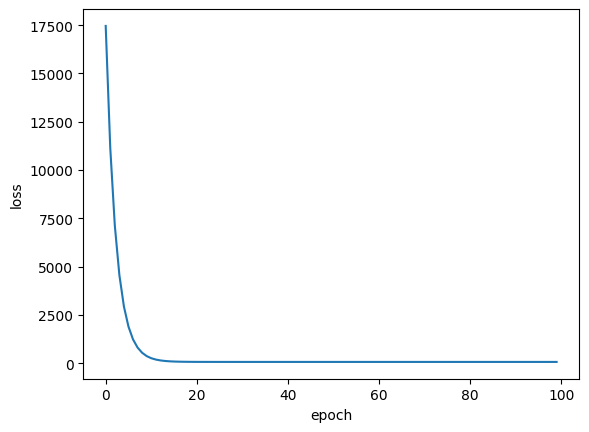

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss[:100])
plt.xlabel("epoch")
plt.ylabel("loss")

plt.show

In [ ]:
def MSE(y_pred, y_data):
  loss = (y_pred - y_data)**2
  return np.mean(loss)

In [ ]:
y_pred = linear_model.predict(X_data)
print(X_raw.reshape(1, -1))
print(y_pred)
# mse = MSE(y_pred, y_data)
# mse

[[ 1  2  3  5  7 10 11 15 20 25 33 38 40 42 45 50 55 56]]
[[  2.25041003]
 [  4.23965987]
 [  6.2289097 ]
 [ 10.20740937]
 [ 14.18590904]
 [ 20.15365855]
 [ 22.14290838]
 [ 30.09990772]
 [ 40.0461569 ]
 [ 49.99240607]
 [ 65.90640475]
 [ 75.85265393]
 [ 79.8311536 ]
 [ 83.80965327]
 [ 89.77740278]
 [ 99.72365195]
 [109.66990113]
 [111.65915096]]


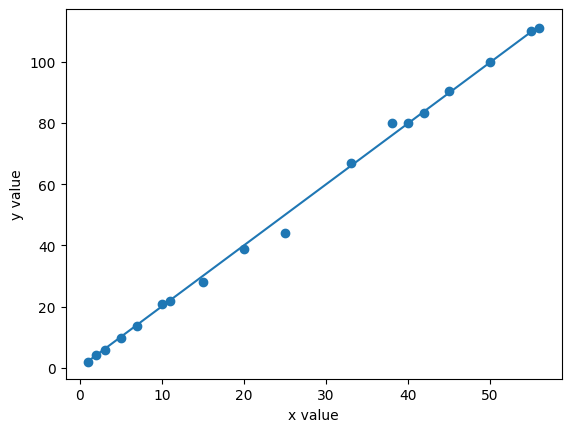

In [ ]:
plt.scatter(X_raw, y_data)
plt.xlabel("x value")
plt.ylabel("y value")
w, b = weight[0], weight[1]
y_pred = [b*x + w for x in X_raw]
plt.plot(X_raw, y_pred)
plt.show()